<a href="https://colab.research.google.com/github/venkatesh58285/ML/blob/main/Lab4_AP23110011217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
data = pd.read_csv('/content/DMV_Written_Tests.csv')
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

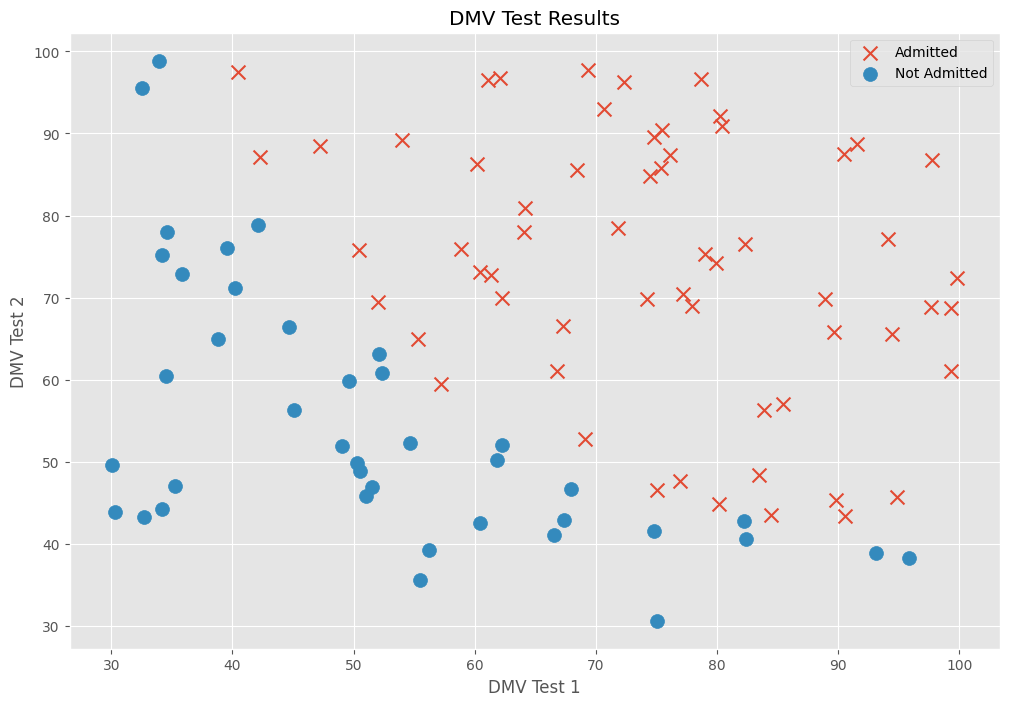

In [ ]:
admitted = data[data['Results'] == 1]
not_admitted = data[data['Results'] == 0]

plt.scatter(admitted['DMV_Test_1'], admitted['DMV_Test_2'], s=100, marker='x', label='Admitted')
plt.scatter(not_admitted['DMV_Test_1'], not_admitted['DMV_Test_2'], s=100, marker='o', label='Not Admitted')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.title('DMV Test Results')
plt.legend()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
def cost_function(theta, x, y):
    m = len(y)
    h = sigmoid(x @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient(theta, x, y):
    m = len(y)
    h = sigmoid(x @ theta)
    grad = (1/m) * (x.T @ (h - y))
    return grad

### Task 6: Cost and Gradient at Initialization
---

In [ ]:
# Add a column of ones to x for the intercept term
x = np.c_[np.ones((data.shape[0], 1)), data[['DMV_Test_1', 'DMV_Test_2']].values]
y = data['Results'].values

# Initialize theta to zeros
theta = np.zeros(x.shape[1])

# Compute initial cost and gradient
initial_cost = cost_function(theta, x, y)
initial_gradient = gradient(theta, x, y)

print("Initial Cost: {:.3f}".format(initial_cost))
print("Initial Gradient:\n", initial_gradient)

Initial Cost: 0.693
Initial Gradient:
 [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
def gradient_descent(theta, x, y, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        theta = theta - alpha * gradient(theta, x, y)
        cost_history.append(cost_function(theta, x, y))

    return theta, cost_history

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

In [ ]:
alpha = 0.001  # Learning rate
num_iterations = 10000  # Number of iterations

# Run gradient descent
optimized_theta, cost_history = gradient_descent(theta.copy(), x, y, alpha, num_iterations)

print("Optimized Theta:", optimized_theta)
print("Final Cost: {:.3f}".format(cost_history[-1]))

Optimized Theta: [-0.66896603  0.0150915   0.00566237]
Final Cost: 0.585


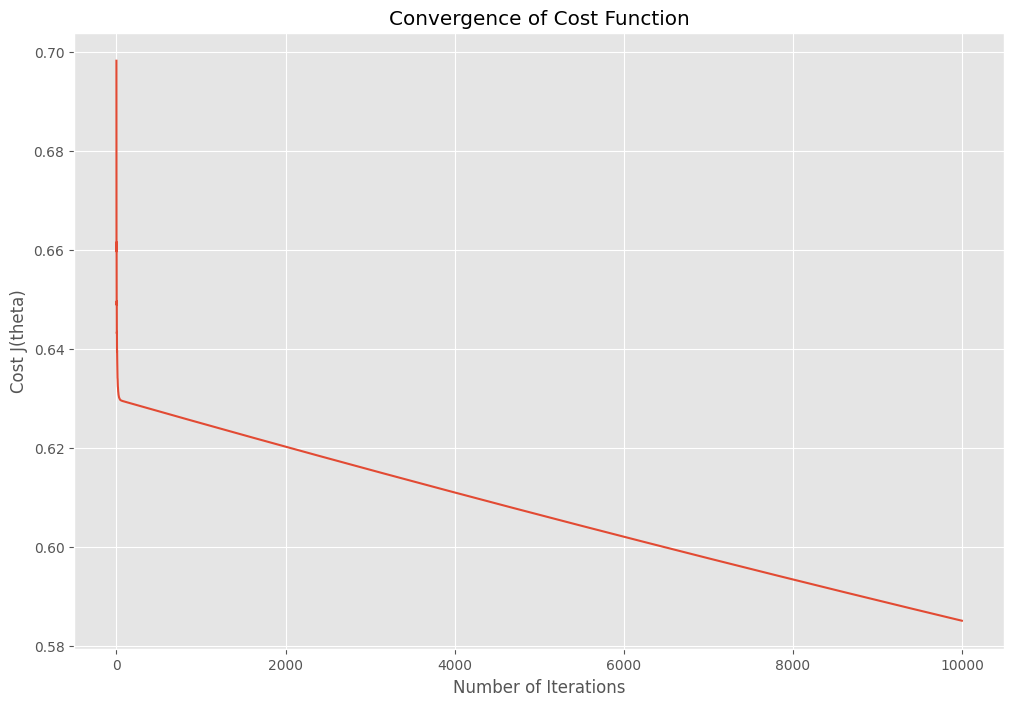

In [ ]:
# Plot the convergence of J(theta)
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J(theta)")
plt.title("Convergence of Cost Function")
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

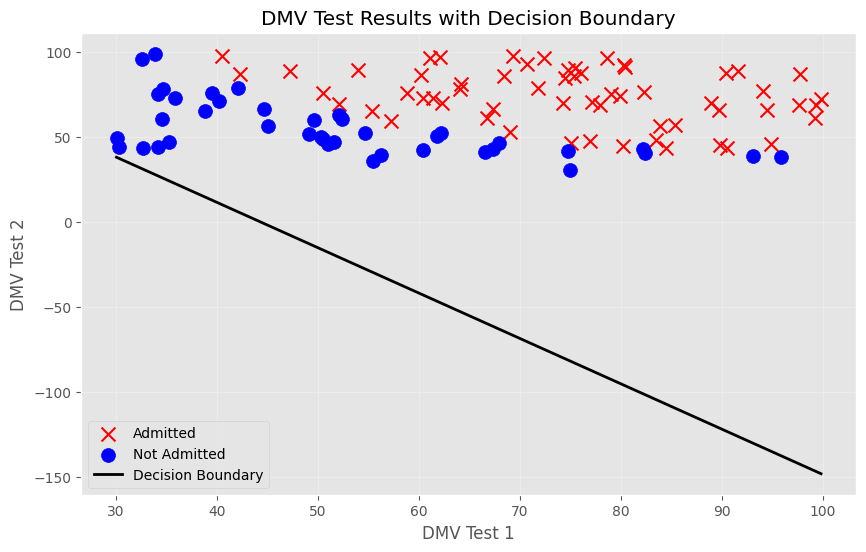

In [ ]:
x_min = min(admitted['DMV_Test_1'].min(), not_admitted['DMV_Test_1'].min())
x_max = max(admitted['DMV_Test_1'].max(), not_admitted['DMV_Test_1'].max())
x_values = np.linspace(x_min, x_max, 100)
y_values = -(optimized_theta[0] + optimized_theta[1] * x_values) / optimized_theta[2]

plt.figure(figsize=(10, 6))
plt.scatter(admitted['DMV_Test_1'], admitted['DMV_Test_2'], s=100, marker='x', color='red', label='Admitted')
plt.scatter(not_admitted['DMV_Test_1'], not_admitted['DMV_Test_2'], s=100, marker='o', color='blue', label='Not Admitted')
plt.plot(x_values, y_values, c='black', linewidth=2, label='Decision Boundary')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.title('DMV Test Results with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
def predict(theta, x):
    h = sigmoid(x @ theta)
    return (h >= 0.5).astype(int)

In [ ]:
predictions = predict(optimized_theta, x)
print("Predictions:\n", predictions)

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
